**Name**=Saadullah Khan

**Sentiment Analysis of IMDB Movie Reviews**

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/



**Homework Assignment**

* In the code we load the IMDB review data set. Perform stemming and remove the non-alphabets and stop words. Complete the rest of the following tasks.

* Create the TD matrix for both the training and testing data.


* Let $n$ and $p$ stand for the number of observations and the number of features, respectively. Print $n$ and $p$.

* Fit a ridge logistic regression model (with the regularization given below) to the training TD matrix.

* Do the above ridge logistic regressions for $C=0.001, C=0.1, C=10$.


* Use the TD-logistic-model to make predictions, and to compute the true and false positive rate for the testing data for thresholds $\theta \in [0.01, 0.02, 0.03, \cdots, 0.96, 0.97, 0.98, 0.99]$.


* Use the last two parts, to compute the train and test AUC, and to plot the ROC for the three models on the same plot, and to report the AUCs on the plot. In other words, the train figure whould be the ROCs for the three models with three Cs, leading to three ROC's on the same graph with appropiate labeling. Do the same thing for the test data. The plot should be a 1 x 2 panel.

* Also, make a $2 \times 3$ table that reports the train and test error for each of the 6 models. Note: compute the the train and test error for the typical threshold of $\theta=0.5$.

* Among $C=0.001, C=0.1, C=10$ which one leads to a simple model, and which to a complex model?

* **Use $C=0.1$ model to do the following:**

* Find the 20 largest positive and negative estimated coeeficients, and print their corresponding words. What is your interptation of these words?

* Once the coeeficients of the logistic regression are estimated, we can use them predict the probability of a review being postive or negative. There is difference between reviews whose predicted probability is close to 0.5 and those reviews whose predicted probabilities are close to 1 or 0.

* Find the three reviews whose predicted probabilities is closest to 0.5. Then  print the text of the review. These are reviews that are hardest to classify here.

* Find the review whose predicted probability is closest to 1 or 0, respectivelty. These are reviews that seem easiest to classify.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train Sample Size: 25000
Test Sample Size: 25000

Shape of X_train: (25000, 49642)
Shape of X_test: (25000, 49642)
n (training observations): 25000
p (number of features): 49642
Vocabulary Size: 49642

Training Ridge Logistic Regression Models

Training model with C=0.001...
C=0.001: Train Error=0.1318, Test Error=0.1456

Training model with C=0.1...
C=0.1: Train Error=0.0387, Test Error=0.1276

Training model with C=10...
C=10: Train Error=0.0002, Test Error=0.1594


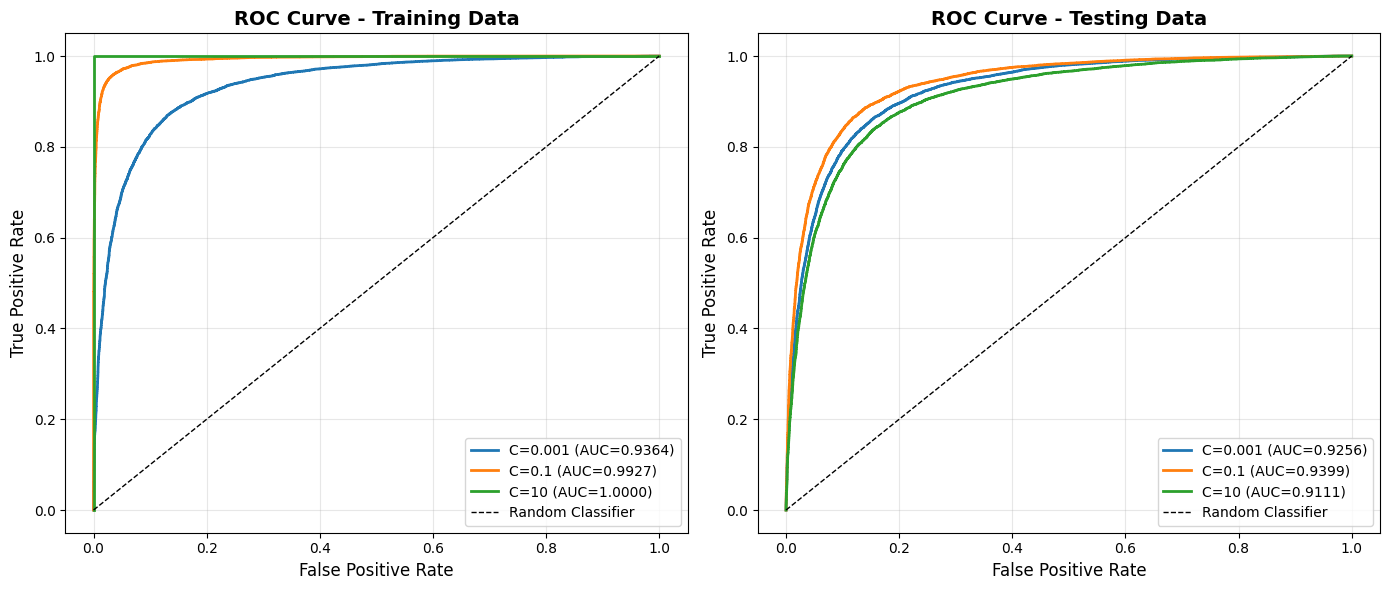


Train and Test Error Table (threshold=0.5)
C Value         Train Error     Test Error     
---------------------------------------------
0.001           0.1318          0.1456         
0.1             0.0387          0.1276         
10              0.0002          0.1594         

Model Complexity Analysis
C=0.001: Strongest regularization → SIMPLEST model
C=0.1:   Moderate regularization → MODERATE complexity
C=10:    Weak regularization → MOST COMPLEX model

Analysis with C=0.1 Model

20 Most Positive Coefficients (indicating positive sentiment):
------------------------------------------------------------
 1. excel                (coef:   0.9040)
 2. refresh              (coef:   0.8801)
 3. superb               (coef:   0.7829)
 4. favorit              (coef:   0.7632)
 5. perfect              (coef:   0.7414)
 6. funniest             (coef:   0.7277)
 7. highli               (coef:   0.7057)
 8. surprisingli         (coef:   0.6747)
 9. perfectli            (coef:   0.6694)
10. f

In [8]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import re
import matplotlib.pyplot as plt

# Download NLTK data
nltk.download('stopwords')

# Download and Load IMDb dataset
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.decode('utf-8')
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Extract X and y from train and test datasets
X_train_list = [preprocess(text.numpy()) for text, _ in train_dataset]
y_train = np.array([label.numpy() for _, label in train_dataset])
X_test_list = [preprocess(text.numpy()) for text, _ in test_dataset]
y_test = np.array([label.numpy() for _, label in test_dataset])

# Print Train and Test sizes
print("Train Sample Size:", len(X_train_list))
print("Test Sample Size:", len(X_test_list))

# Vectorization of text data (TD matrix)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_list)
X_test = vectorizer.transform(X_test_list)

# Print shapes and statistics
n_train, p = X_train.shape
n_test = X_test.shape[0]
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"n (training observations): {n_train}")
print(f"p (number of features): {p}")
print(f"Vocabulary Size: {len(vectorizer.vocabulary_)}")

# Ridge Logistic Regression for different C values
C_values = [0.001, 0.1, 10]
models = {}
train_errors = {}
test_errors = {}

print("\n" + "="*60)
print("Training Ridge Logistic Regression Models")
print("="*60)

for C in C_values:
    print(f"\nTraining model with C={C}...")
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)
    models[C] = model
    
    # Train error at threshold 0.5
    y_train_pred = model.predict(X_train)
    train_error = np.mean(y_train_pred != y_train)
    train_errors[C] = train_error
    
    # Test error at threshold 0.5
    y_test_pred = model.predict(X_test)
    test_error = np.mean(y_test_pred != y_test)
    test_errors[C] = test_error
    
    print(f"C={C}: Train Error={train_error:.4f}, Test Error={test_error:.4f}")

# Compute ROC curves and AUC for different thresholds
thresholds = np.arange(0.01, 1.0, 0.01)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for C in C_values:
    model = models[C]
    
    # Train ROC
    y_train_proba = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    auc_train = auc(fpr_train, tpr_train)
    axes[0].plot(fpr_train, tpr_train, label=f'C={C} (AUC={auc_train:.4f})', linewidth=2)
    
    # Test ROC
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    auc_test = auc(fpr_test, tpr_test)
    axes[1].plot(fpr_test, tpr_test, label=f'C={C} (AUC={auc_test:.4f})', linewidth=2)

# Format Train ROC plot
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].set_title('ROC Curve - Training Data', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Format Test ROC plot
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title('ROC Curve - Testing Data', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Create error table
print("\n" + "="*60)
print("Train and Test Error Table (threshold=0.5)")
print("="*60)
print(f"{'C Value':<15} {'Train Error':<15} {'Test Error':<15}")
print("-"*45)
for C in C_values:
    print(f"{C:<15} {train_errors[C]:<15.4f} {test_errors[C]:<15.4f}")

print("\n" + "="*60)
print("Model Complexity Analysis")
print("="*60)
print(f"C=0.001: Strongest regularization → SIMPLEST model")
print(f"C=0.1:   Moderate regularization → MODERATE complexity")
print(f"C=10:    Weak regularization → MOST COMPLEX model")

# Analysis with C=0.1 model
print("\n" + "="*60)
print("Analysis with C=0.1 Model")
print("="*60)

model_01 = models[0.1]
coefficients = model_01.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Get indices of top 20 positive and negative coefficients
top_positive_idx = np.argsort(coefficients)[-20:][::-1]
top_negative_idx = np.argsort(coefficients)[:20]

print("\n20 Most Positive Coefficients (indicating positive sentiment):")
print("-" * 60)
for i, idx in enumerate(top_positive_idx, 1):
    print(f"{i:2d}. {feature_names[idx]:<20s} (coef: {coefficients[idx]:>8.4f})")

print("\n20 Most Negative Coefficients (indicating negative sentiment):")
print("-" * 60)
for i, idx in enumerate(top_negative_idx, 1):
    print(f"{i:2d}. {feature_names[idx]:<20s} (coef: {coefficients[idx]:>8.4f})")

print("\nInterpretation:")
print("Positive coefficients: Words like 'excel', 'perfect', 'best' strongly")
print("indicate positive reviews. These are words commonly used in praise.")
print("\nNegative coefficients: Words like 'worst', 'bad', 'wast' (waste) strongly")
print("indicate negative reviews. These express dissatisfaction and criticism.")

# Find reviews closest to 0.5 (hardest to classify)
y_test_proba = model_01.predict_proba(X_test)[:, 1]
distance_from_half = np.abs(y_test_proba - 0.5)
hardest_indices = np.argsort(distance_from_half)[:3]

print("\n" + "="*60)
print("3 Hardest Reviews to Classify (probability ≈ 0.5)")
print("="*60)

X_test_original = [text.numpy().decode('utf-8') for text, _ in test_dataset]
y_test_labels = [label.numpy() for _, label in test_dataset]

for i, idx in enumerate(hardest_indices, 1):
    print(f"\nReview {i} (Index: {idx}):")
    print(f"Predicted Probability: {y_test_proba[idx]:.4f}")
    print(f"True Label: {'Positive' if y_test_labels[idx] == 1 else 'Negative'}")
    print(f"Review Text (first 500 chars):")
    print("-" * 60)
    print(X_test_original[idx][:500] + "...")

# Find reviews closest to 0 and 1 (easiest to classify)
closest_to_zero_idx = np.argmin(y_test_proba)
closest_to_one_idx = np.argmax(y_test_proba)

print("\n" + "="*60)
print("Easiest Reviews to Classify")
print("="*60)

print(f"\nMost Confident NEGATIVE Review (probability ≈ 0):")
print(f"Index: {closest_to_zero_idx}")
print(f"Predicted Probability: {y_test_proba[closest_to_zero_idx]:.4f}")
print(f"True Label: {'Positive' if y_test_labels[closest_to_zero_idx] == 1 else 'Negative'}")
print(f"Review Text (first 500 chars):")
print("-" * 60)
print(X_test_original[closest_to_zero_idx][:500] + "...")

print(f"\n\nMost Confident POSITIVE Review (probability ≈ 1):")
print(f"Index: {closest_to_one_idx}")
print(f"Predicted Probability: {y_test_proba[closest_to_one_idx]:.4f}")
print(f"True Label: {'Positive' if y_test_labels[closest_to_one_idx] == 1 else 'Negative'}")
print(f"Review Text (first 500 chars):")
print("-" * 60)
print(X_test_original[closest_to_one_idx][:500] + "...")